# Data Augmentation

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/data_augmentation_2d.ipynb)


Just a simple examples showing the Augmentations available on Kornia.

For more information check the docs: https://kornia.readthedocs.io/en/latest/augmentation.module.html

In [ ]:
import kornia
import matplotlib.pyplot as plt
from kornia.augmentation import (
    CenterCrop,
    ColorJiggle,
    ColorJitter,
    PadTo,
    RandomAffine,
    RandomBoxBlur,
    RandomBrightness,
    RandomChannelShuffle,
    RandomContrast,
    RandomCrop,
    RandomCutMixV2,
    RandomElasticTransform,
    RandomEqualize,
    RandomErasing,
    RandomFisheye,
    RandomGamma,
    RandomGaussianBlur,
    RandomGaussianNoise,
    RandomGrayscale,
    RandomHorizontalFlip,
    RandomHue,
    RandomInvert,
    RandomJigsaw,
    RandomMixUpV2,
    RandomMosaic,
    RandomMotionBlur,
    RandomPerspective,
    RandomPlanckianJitter,
    RandomPlasmaBrightness,
    RandomPlasmaContrast,
    RandomPlasmaShadow,
    RandomPosterize,
    RandomResizedCrop,
    RandomRGBShift,
    RandomRotation,
    RandomSaturation,
    RandomSharpness,
    RandomSolarize,
    RandomThinPlateSpline,
    RandomVerticalFlip,
)

## Load an Image

The augmentations expects an image with shape `BxCxHxW`

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/kornia/data/main/panda.jpg

In [ ]:
img_type = kornia.io.ImageLoadType.RGB32
img = kornia.io.load_image("panda.jpg", img_type, "cpu")[None]

In [ ]:
def plot_tensor(data, title=""):
    b, c, h, w = data.shape

    fig, axes = plt.subplots(1, b, dpi=150, subplot_kw={"aspect": "equal"})
    if b == 1:
        axes = [axes]

    for idx, ax in enumerate(axes):
        ax.imshow(kornia.utils.tensor_to_image(data[idx, ...]))
        ax.set_ylim(h, 0)
        ax.set_xlim(0, w)
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    fig.suptitle(title)
    plt.show()

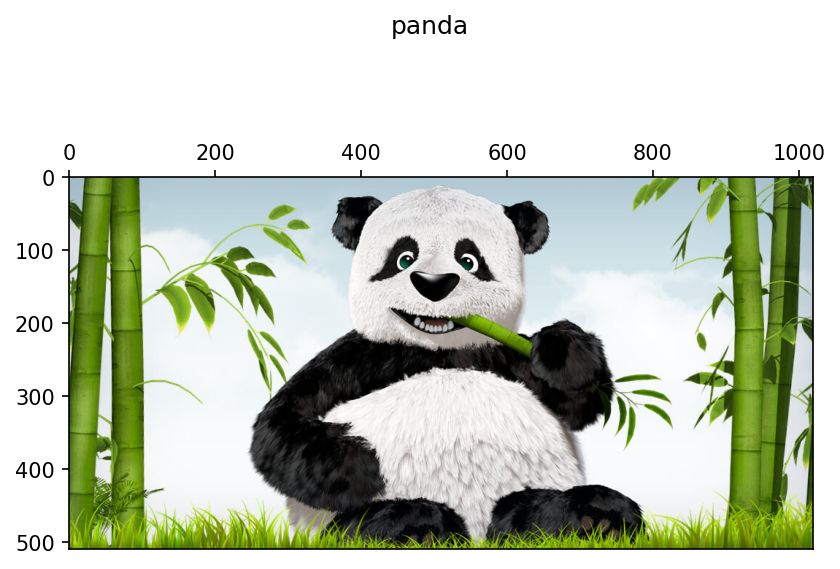

In [ ]:
plot_tensor(img, "panda")

## 2D transforms

Sometimes you may wish to apply the exact same transformations on all the elements in one batch. Here, we provided a `same_on_batch` keyword to all random generators for you to use. Instead of an element-wise parameter generating, it will generate exact same parameters across the whole batch.

In [ ]:
# Create a batched input
num_samples = 2

inpt = img.repeat(num_samples, 1, 1, 1)

### Intensity

####  Random Planckian Jitter

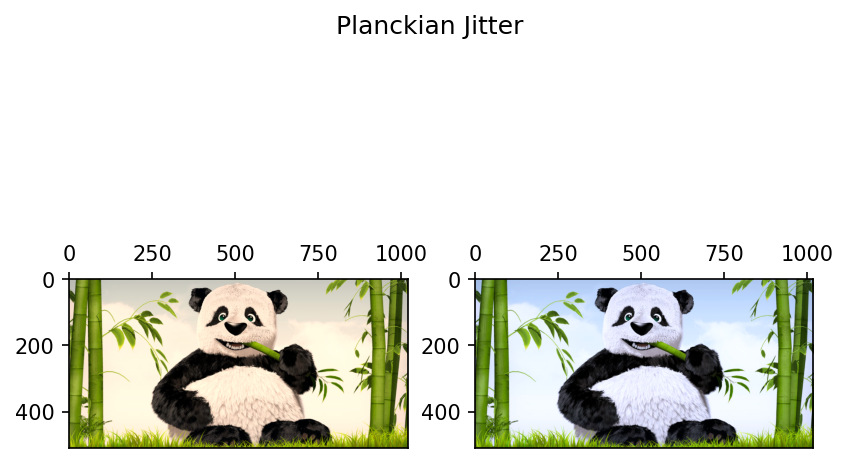

In [ ]:
randomplanckianjitter = RandomPlanckianJitter("blackbody", same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomplanckianjitter(inpt), "Planckian Jitter")

#### Random Plasma Shadow

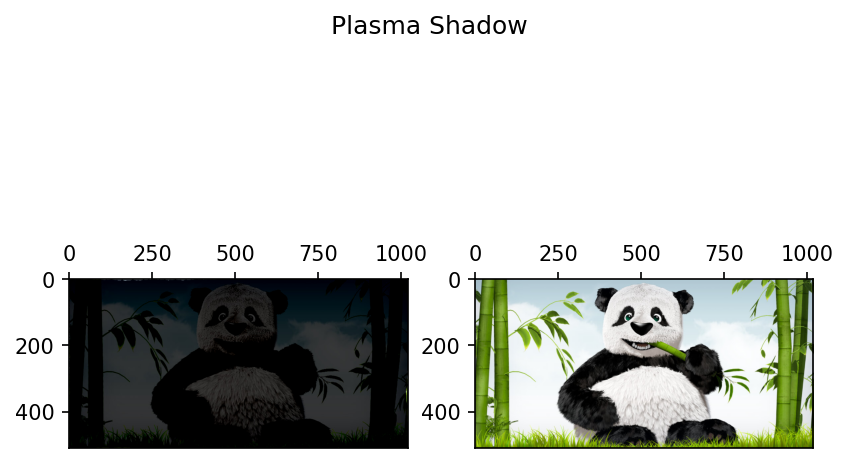

In [ ]:
randomplasmashadow = RandomPlasmaShadow(
    roughness=(0.1, 0.7), shade_intensity=(-1.0, 0.0), shade_quantity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0
)

plot_tensor(randomplasmashadow(inpt), "Plasma Shadow")

#### Random Plasma Brightness

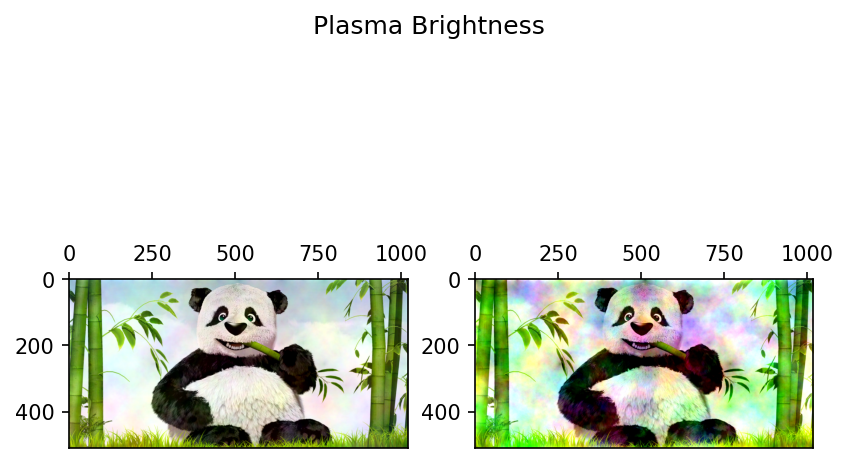

In [ ]:
randomplasmabrightness = RandomPlasmaBrightness(
    roughness=(0.1, 0.7), intensity=(0.0, 1.0), same_on_batch=False, keepdim=False, p=1.0
)
plot_tensor(randomplasmabrightness(inpt), "Plasma Brightness")

#### Random Plasma Contrast

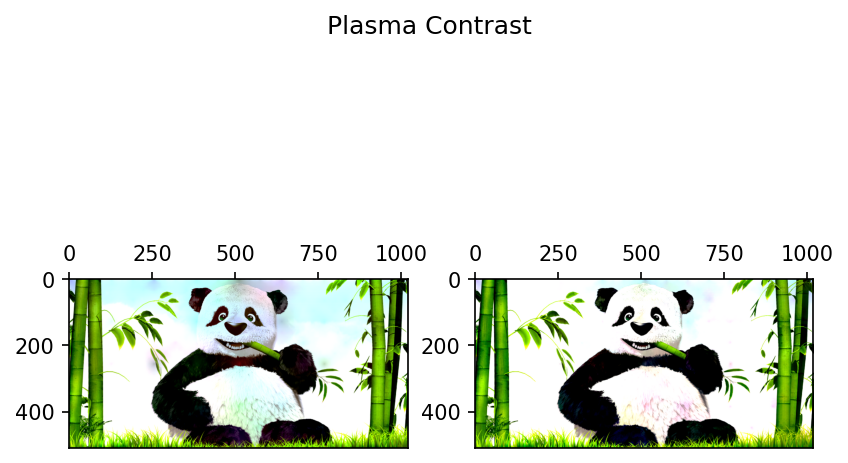

In [ ]:
randomplasmacontrast = RandomPlasmaContrast(roughness=(0.1, 0.7), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomplasmacontrast(inpt), "Plasma Contrast")

#### Color Jiggle

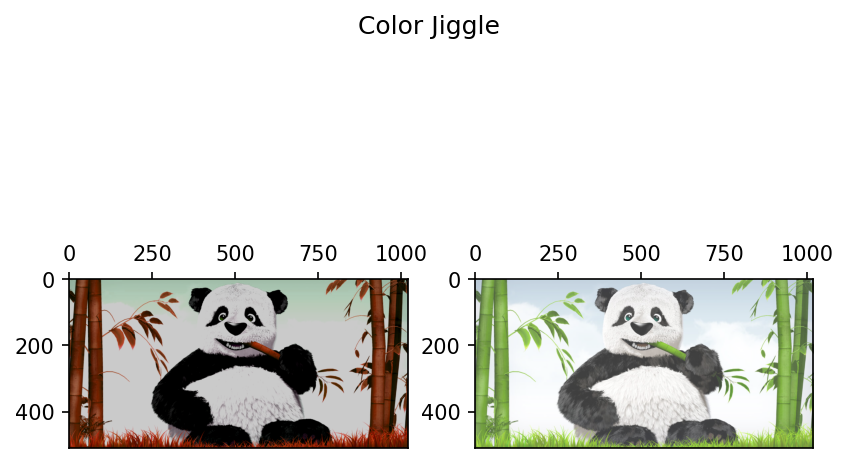

In [ ]:
colorjiggle = ColorJiggle(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(colorjiggle(inpt), "Color Jiggle")

#### Color Jitter

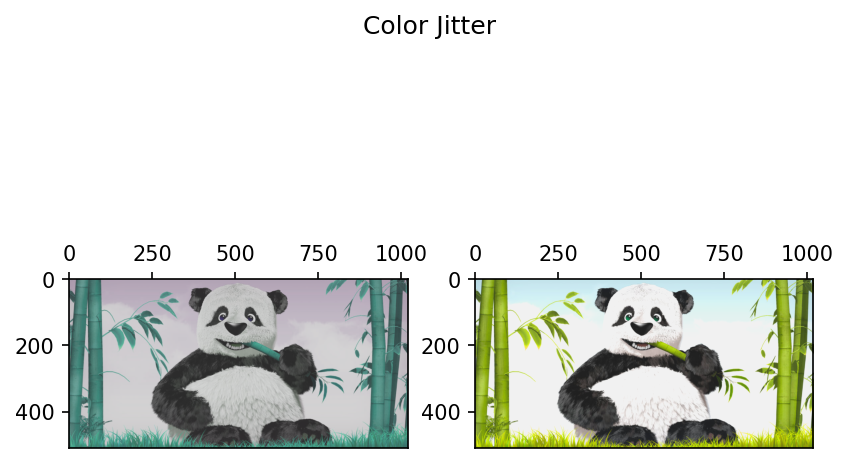

In [ ]:
colorjitter = ColorJitter(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(colorjitter(inpt), "Color Jitter")

#### Random Box Blur

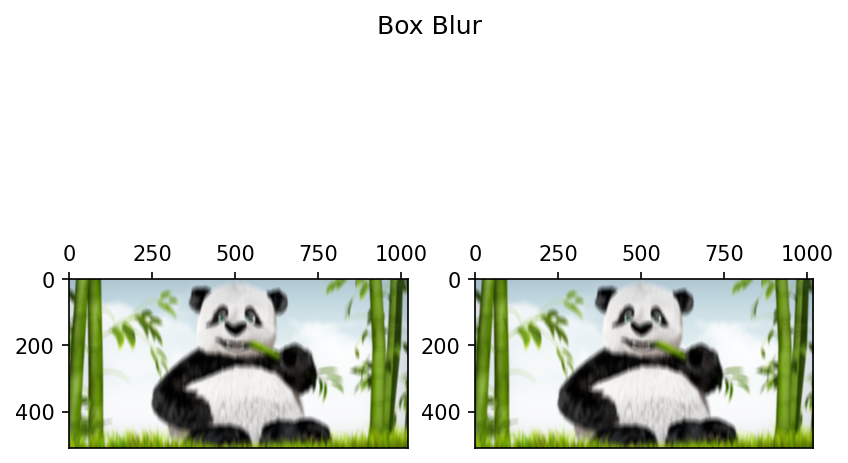

In [ ]:
randomboxblur = RandomBoxBlur((21, 5), "reflect", same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomboxblur(inpt), "Box Blur")

#### Random Brightness

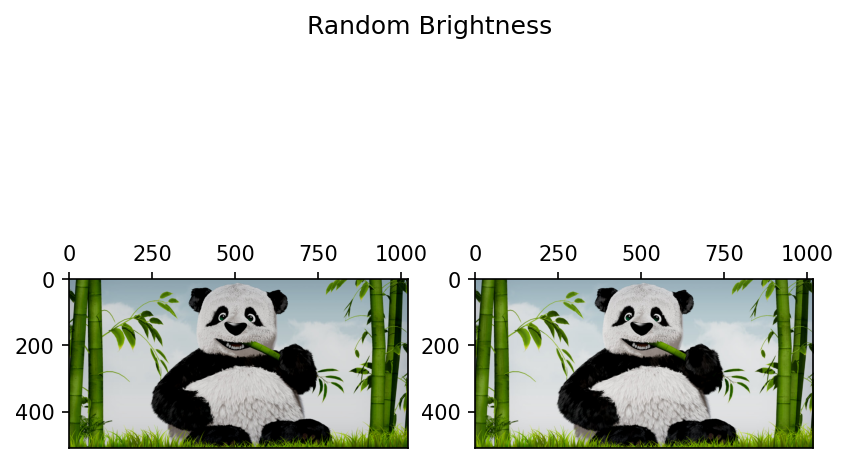

In [ ]:
randombrightness = RandomBrightness(brightness=(0.8, 1.2), clip_output=True, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randombrightness(inpt), "Random Brightness")

#### Random Channel Shuffle

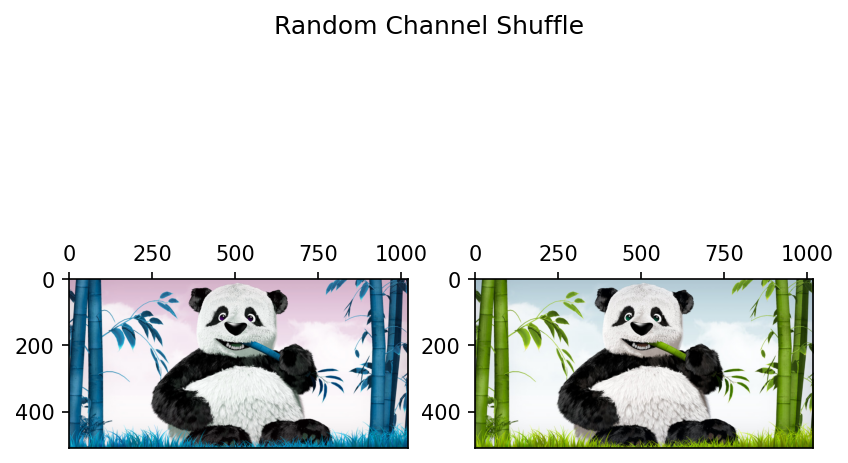

In [ ]:
randomchannelshuffle = RandomChannelShuffle(same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomchannelshuffle(inpt), "Random Channel Shuffle")

#### Random Contrast

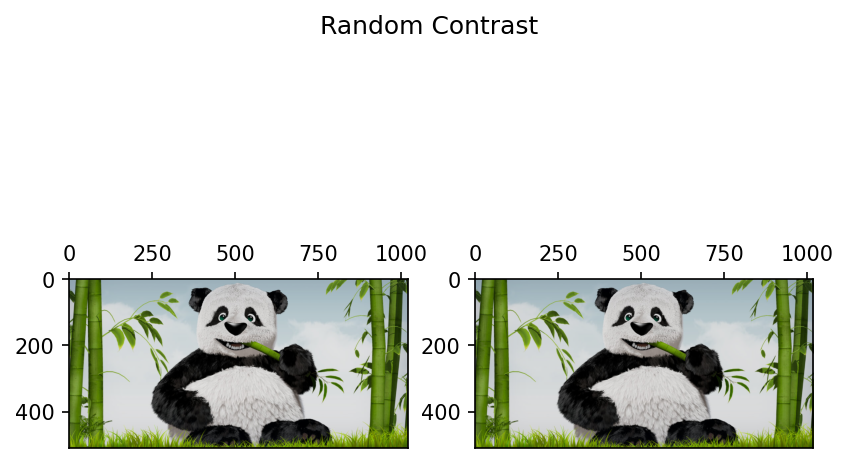

In [ ]:
randomcontrast = RandomContrast(contrast=(0.8, 1.2), clip_output=True, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomcontrast(inpt), "Random Contrast")

#### Random Equalize

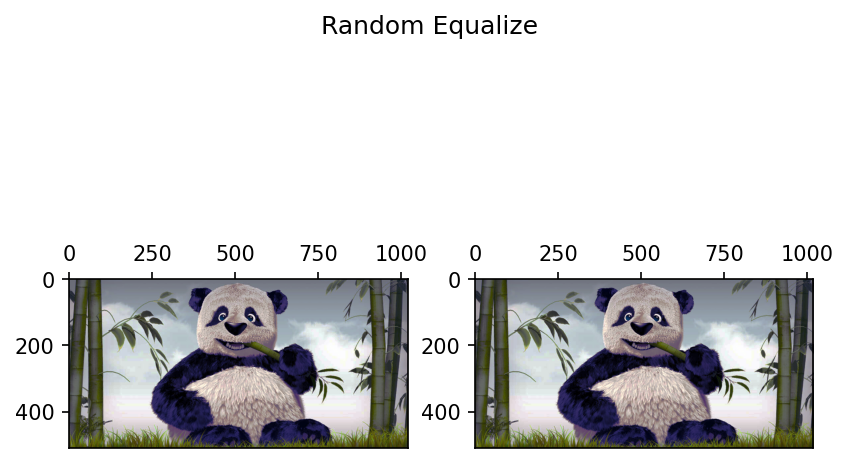

In [ ]:
randomequalize = RandomEqualize(same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomequalize(inpt), "Random Equalize")

#### Random Gamma

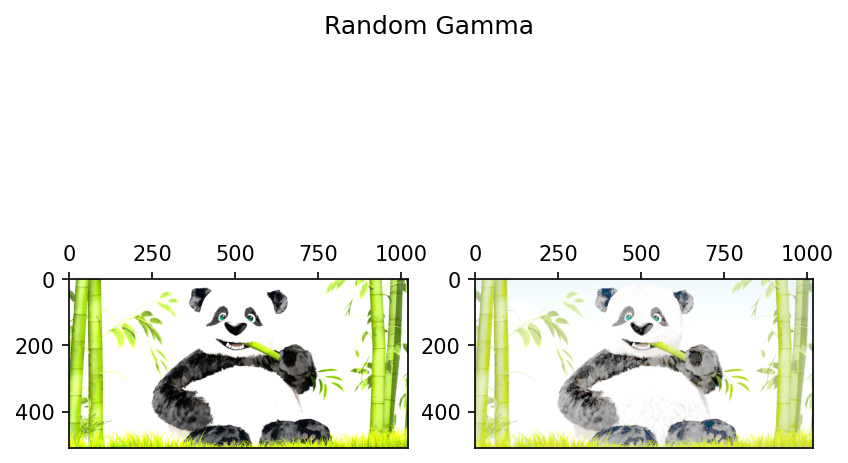

In [ ]:
randomgamma = RandomGamma((0.2, 1.3), (1.0, 1.5), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomgamma(inpt), "Random Gamma")

#### Random Grayscale

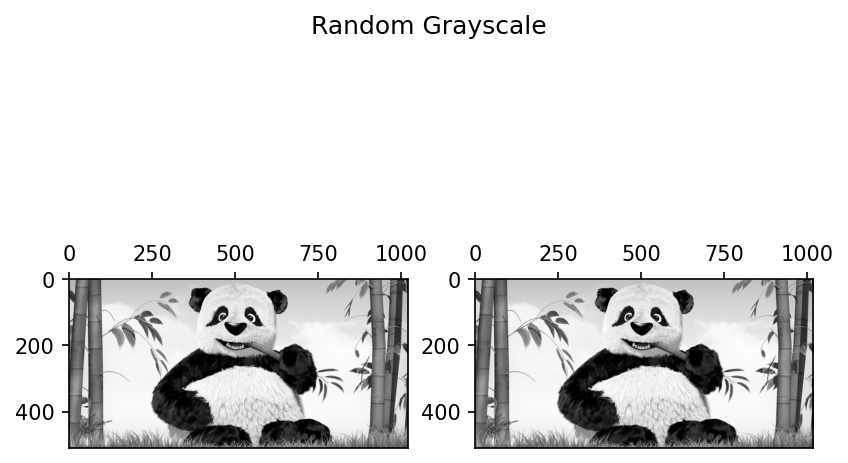

In [ ]:
randomgrayscale = RandomGrayscale(same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomgrayscale(inpt), "Random Grayscale")

#### Random Gaussian Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


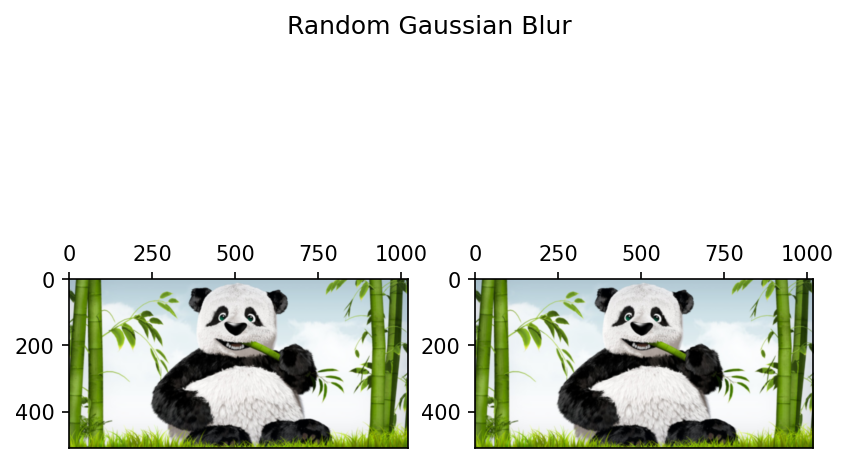

In [ ]:
randomgaussianblur = RandomGaussianBlur((21, 21), (0.2, 1.3), "reflect", same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomgaussianblur(inpt), "Random Gaussian Blur")

#### Random Gaussian Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


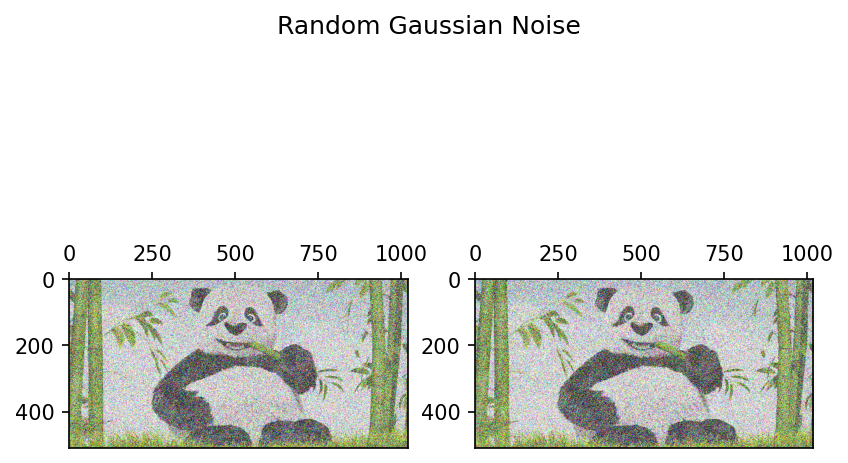

In [ ]:
randomgaussiannoise = RandomGaussianNoise(mean=0.2, std=0.7, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomgaussiannoise(inpt), "Random Gaussian Noise")

#### Random Hue

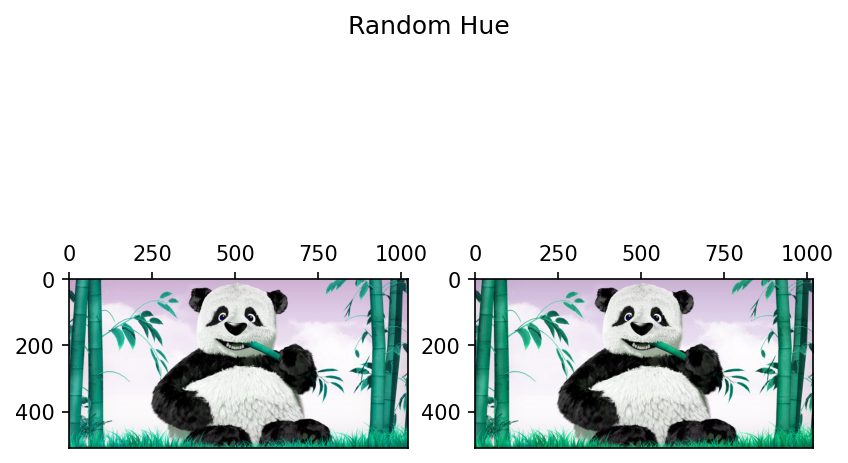

In [ ]:
randomhue = RandomHue((-0.2, 0.4), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomhue(inpt), "Random Hue")

#### Random Motion Blur

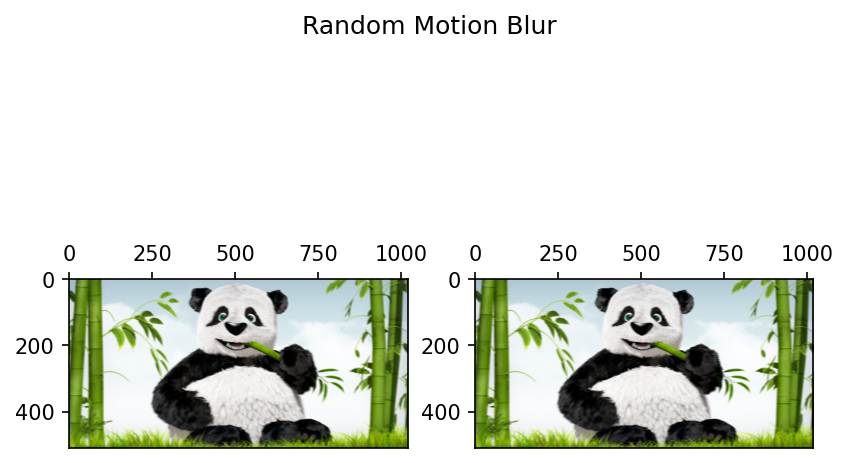

In [ ]:
randommotionblur = RandomMotionBlur((7, 7), 35.0, 0.5, "reflect", "nearest", same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randommotionblur(inpt), "Random Motion Blur")

#### Random Posterize

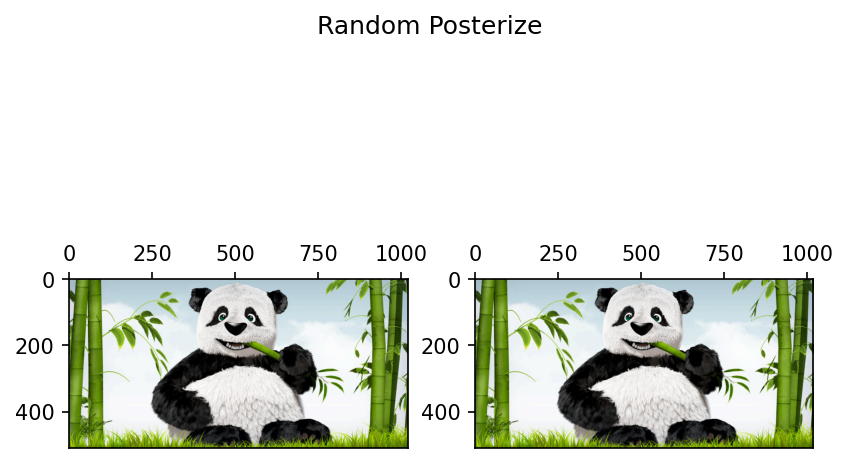

In [ ]:
randomposterize = RandomPosterize(bits=3, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomposterize(inpt), "Random Posterize")

#### Random RGB Shift

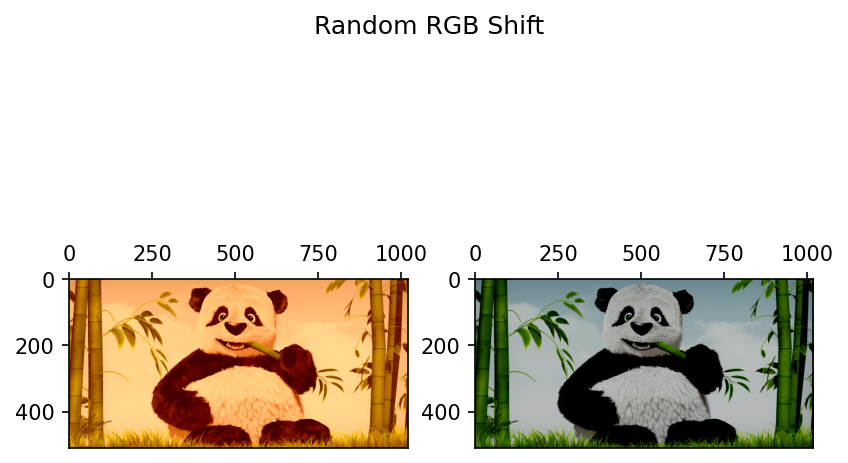

In [ ]:
randomrgbshift = RandomRGBShift(
    r_shift_limit=0.5, g_shift_limit=0.5, b_shift_limit=0.5, same_on_batch=False, keepdim=False, p=1.0
)
plot_tensor(randomrgbshift(inpt), "Random RGB Shift")

#### Random Saturation

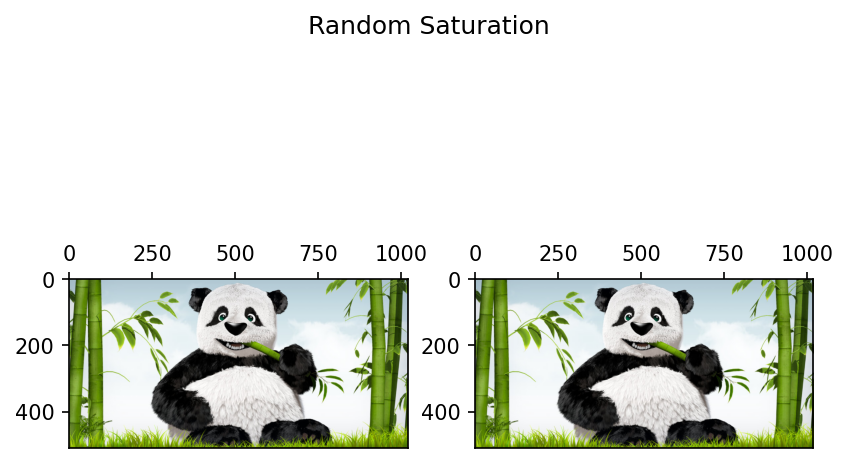

In [ ]:
randomsaturation = RandomSaturation((1.0, 1.0), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomsaturation(inpt), "Random Saturation")

#### Random Sharpness

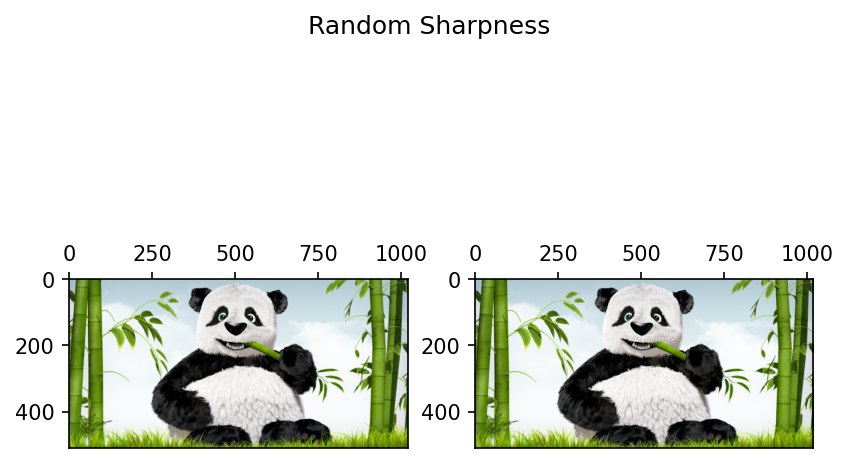

In [ ]:
randomsharpness = RandomSharpness((0.5, 1.0), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomsharpness(inpt), "Random Sharpness")

#### Random Solarize

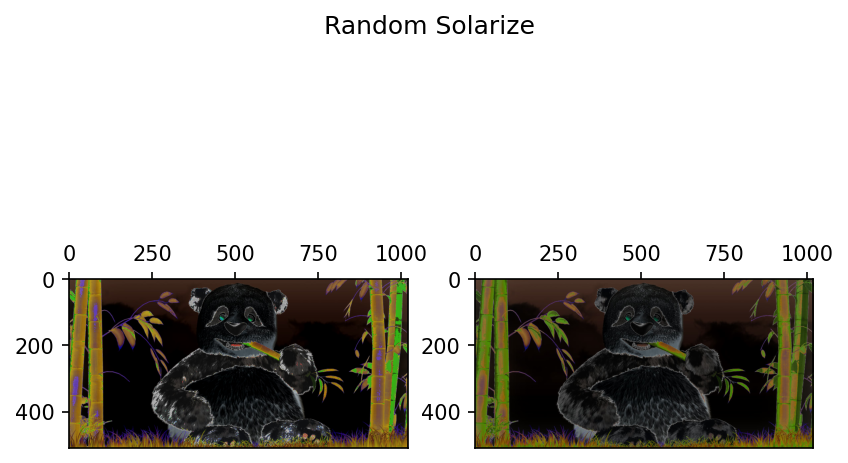

In [ ]:
randomsolarize = RandomSolarize(0.3, 0.1, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomsolarize(inpt), "Random Solarize")

### Geometric

#### Center Crop

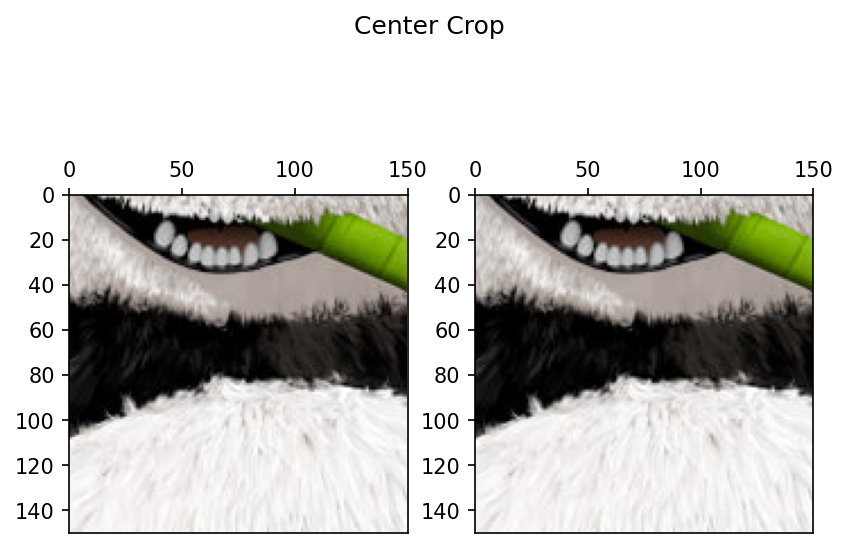

In [ ]:
centercrop = CenterCrop(150, resample="nearest", cropping_mode="resample", align_corners=True, keepdim=False, p=1.0)

plot_tensor(centercrop(inpt), "Center Crop")

#### Pad To

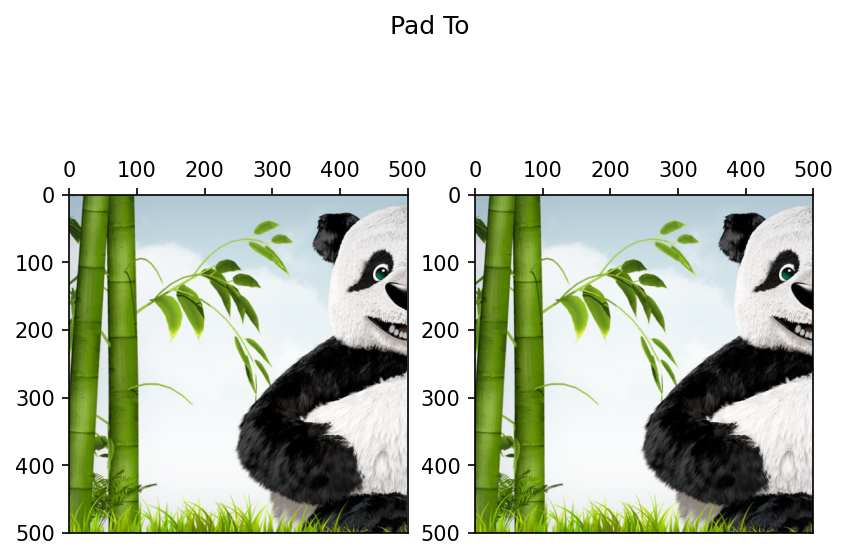

In [ ]:
padto = PadTo((500, 500), "constant", 1, keepdim=False)

plot_tensor(padto(inpt), "Pad To")

#### Random Affine

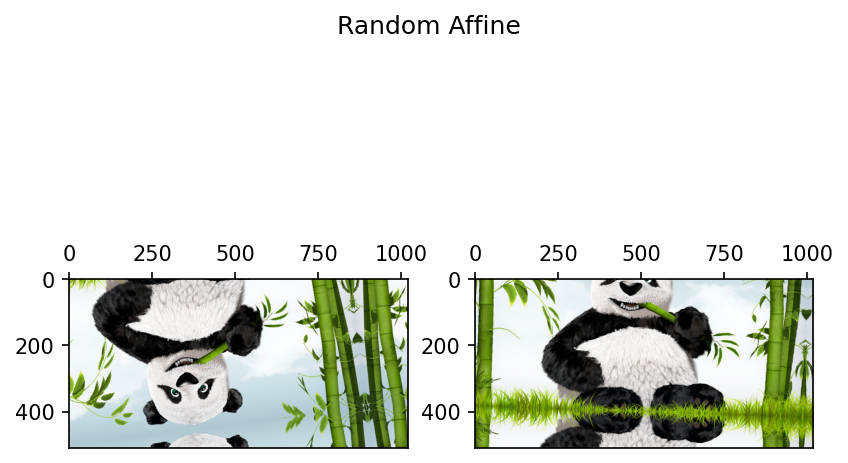

In [ ]:
randomaffine = RandomAffine(
    (-15.0, 5.0),
    (0.3, 1.0),
    (0.4, 1.3),
    0.5,
    resample="nearest",
    padding_mode="reflection",
    align_corners=True,
    same_on_batch=False,
    keepdim=False,
    p=1.0,
)
plot_tensor(randomaffine(inpt), "Random Affine")

#### Random Crop

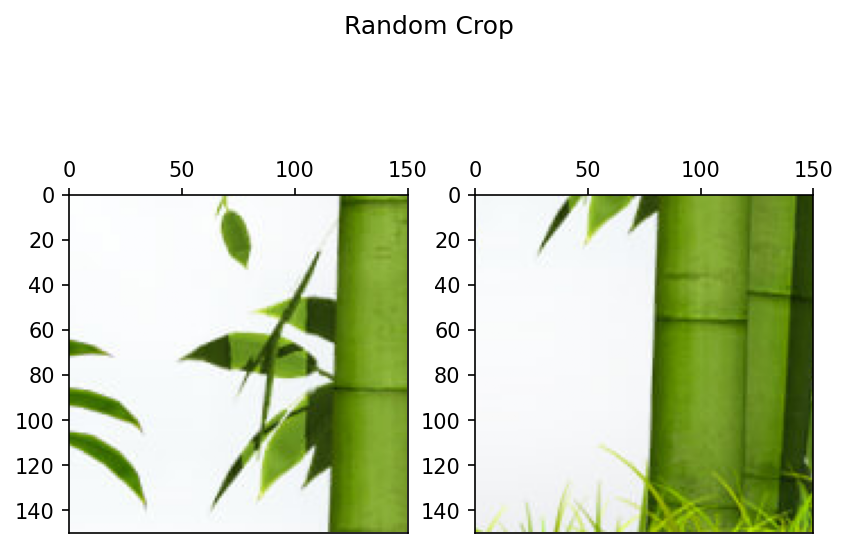

In [ ]:
randomcrop = RandomCrop(
    (150, 150),
    10,
    True,
    1,
    "constant",
    "nearest",
    cropping_mode="resample",
    same_on_batch=False,
    align_corners=True,
    keepdim=False,
    p=1.0,
)

plot_tensor(randomcrop(inpt), "Random Crop")

#### Random Erasing

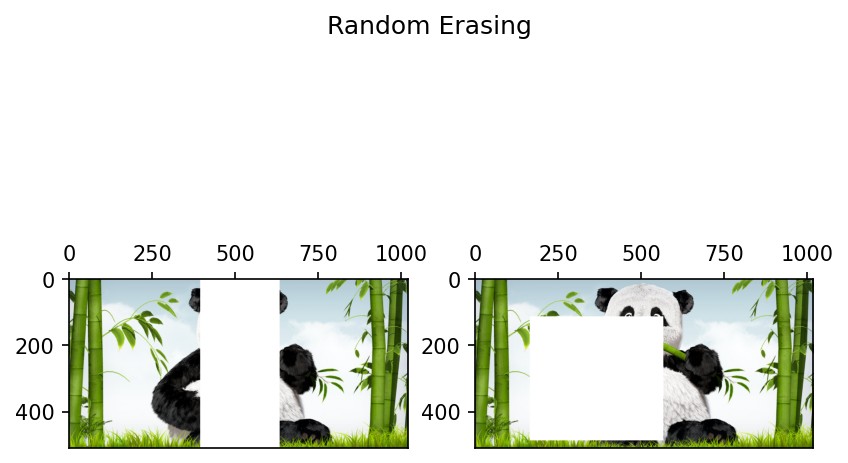

In [ ]:
randomerasing = RandomErasing(scale=(0.02, 0.33), ratio=(0.3, 3.3), value=1, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomerasing(inpt), "Random Erasing")

#### Random Elastic Transform

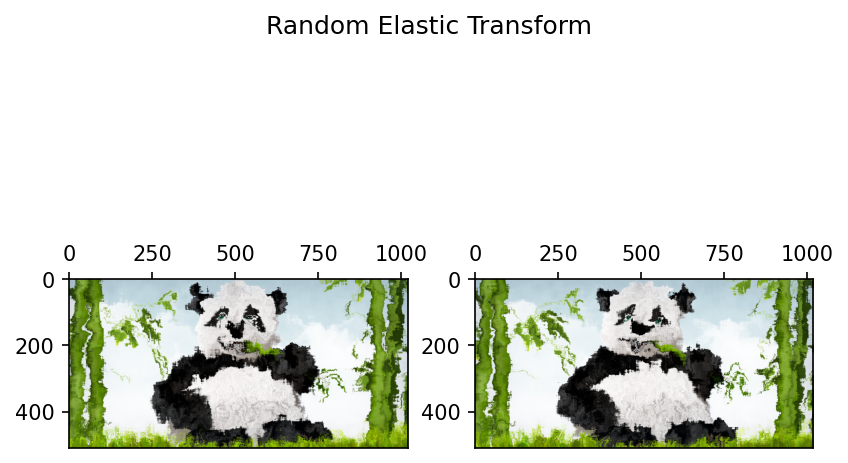

In [ ]:
randomelastictransform = RandomElasticTransform(
    (27, 27), (33, 31), (0.5, 1.5), align_corners=True, padding_mode="reflection", same_on_batch=False, keepdim=False, p=1.0
)

plot_tensor(randomelastictransform(inpt), "Random Elastic Transform")

#### Random Fish Eye

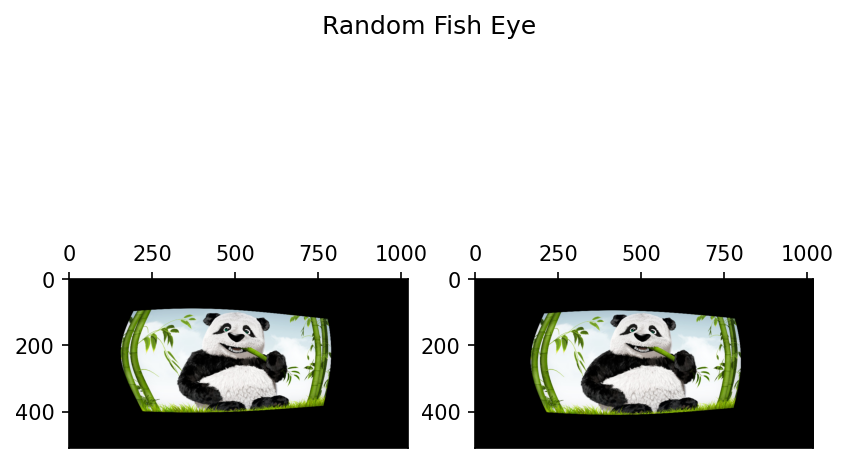

In [ ]:
c = kornia.core.tensor([-0.3, 0.3])
g = kornia.core.tensor([0.9, 1.0])
randomfisheye = RandomFisheye(c, c, g, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomfisheye(inpt), "Random Fish Eye")

#### Random Horizontal Flip

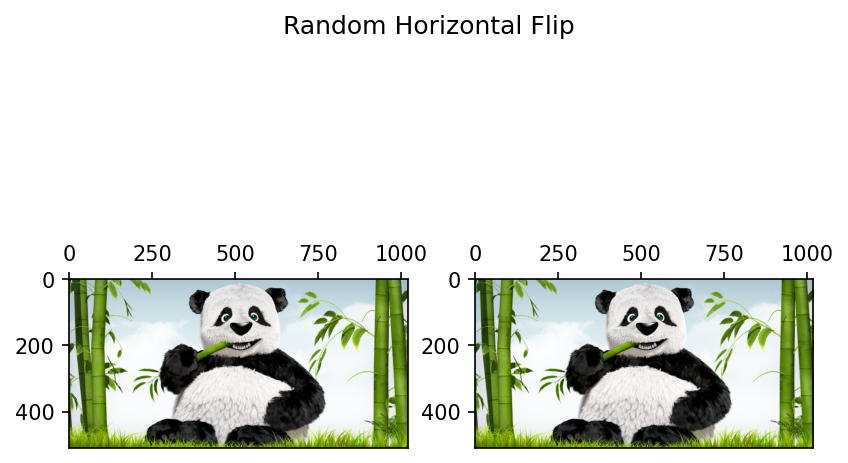

In [ ]:
randomhorizontalflip = RandomHorizontalFlip(same_on_batch=False, keepdim=False, p=0.7)

plot_tensor(randomhorizontalflip(inpt), "Random Horizontal Flip")

#### Random Invert

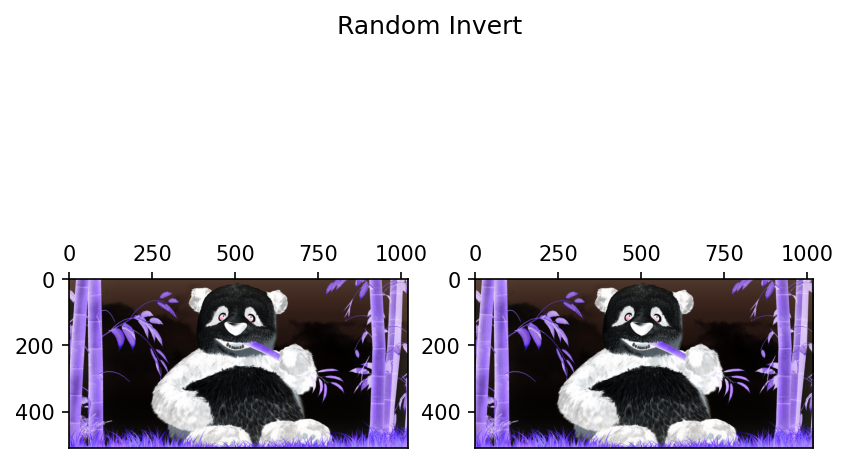

In [ ]:
randominvert = RandomInvert(same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randominvert(inpt), "Random Invert")

#### Random Perspective

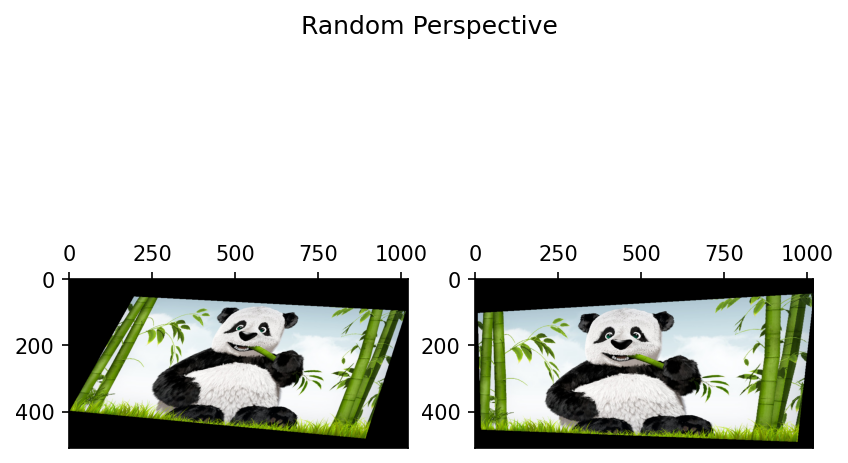

In [ ]:
randomperspective = RandomPerspective(0.5, "nearest", align_corners=True, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomperspective(inpt), "Random Perspective")

#### Random Resized Crop

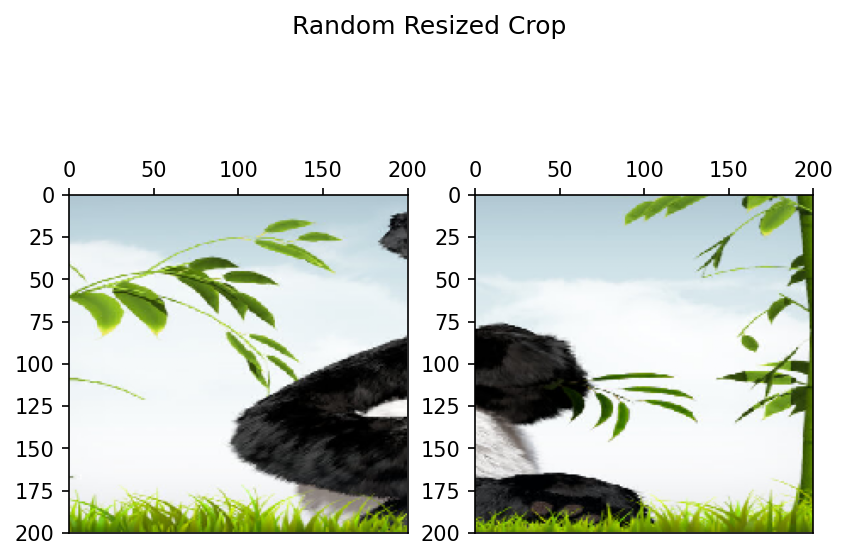

In [ ]:
randomresizedcrop = RandomResizedCrop(
    (200, 200),
    (0.4, 1.0),
    (2.0, 2.0),
    "nearest",
    align_corners=True,
    cropping_mode="resample",
    same_on_batch=False,
    keepdim=False,
    p=1.0,
)

plot_tensor(randomresizedcrop(inpt), "Random Resized Crop")

#### Random Rotation

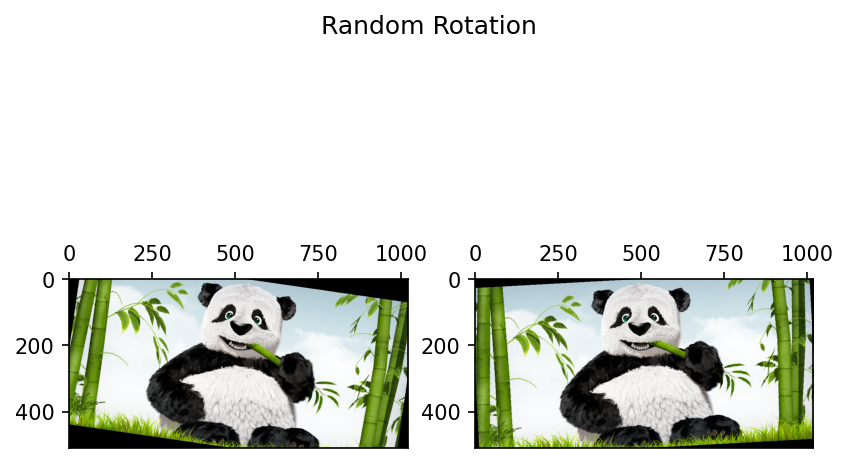

In [ ]:
randomrotation = RandomRotation(15.0, "nearest", align_corners=True, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomrotation(inpt), "Random Rotation")

#### Random Vertical Flip

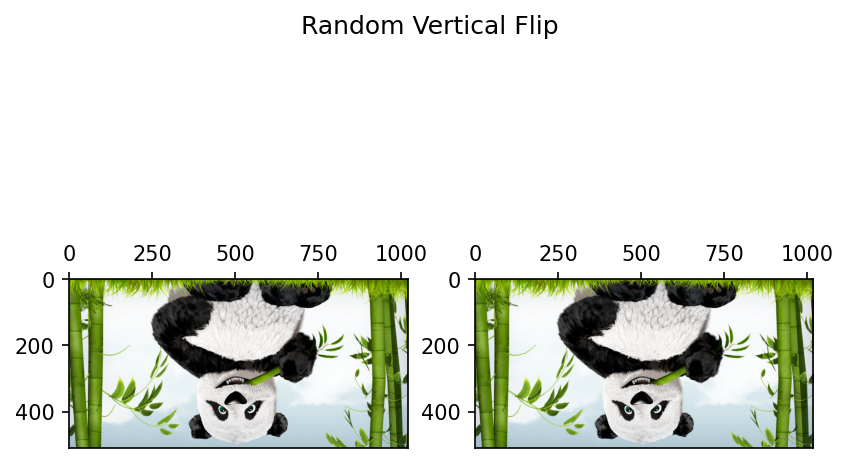

In [ ]:
randomverticalflip = RandomVerticalFlip(same_on_batch=False, keepdim=False, p=0.6, p_batch=1.0)

plot_tensor(randomverticalflip(inpt), "Random Vertical Flip")

#### Random Thin Plate Spline

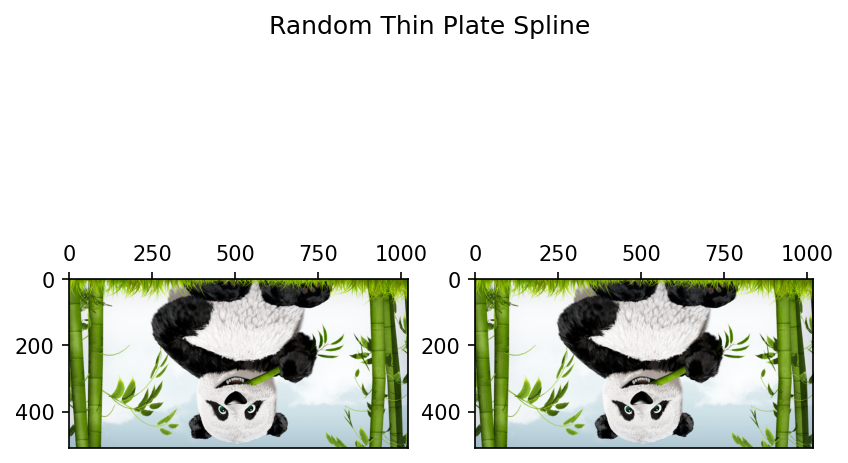

In [ ]:
randomthinplatespline = RandomThinPlateSpline(0.6, align_corners=True, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomverticalflip(inpt), "Random Thin Plate Spline")

### Mix

#### Random Cut Mix

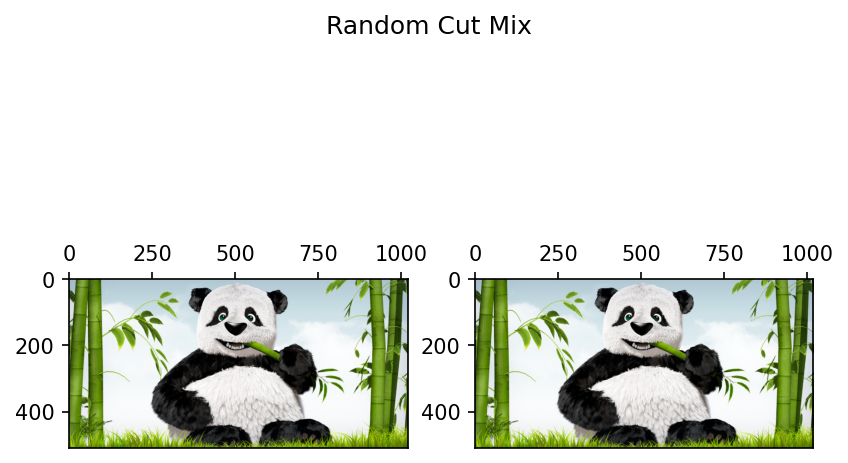

In [ ]:
randomcutmixv2 = RandomCutMixV2(4, (0.2, 0.9), 0.1, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomcutmixv2(inpt), "Random Cut Mix")

#### Random Mix Up

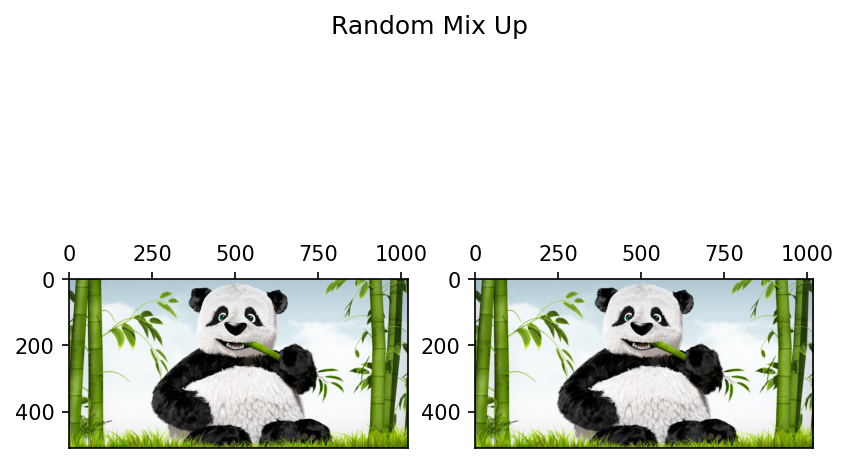

In [ ]:
randommixupv2 = RandomMixUpV2((0.1, 0.9), same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randommixupv2(inpt), "Random Mix Up")

#### Random Mosaic

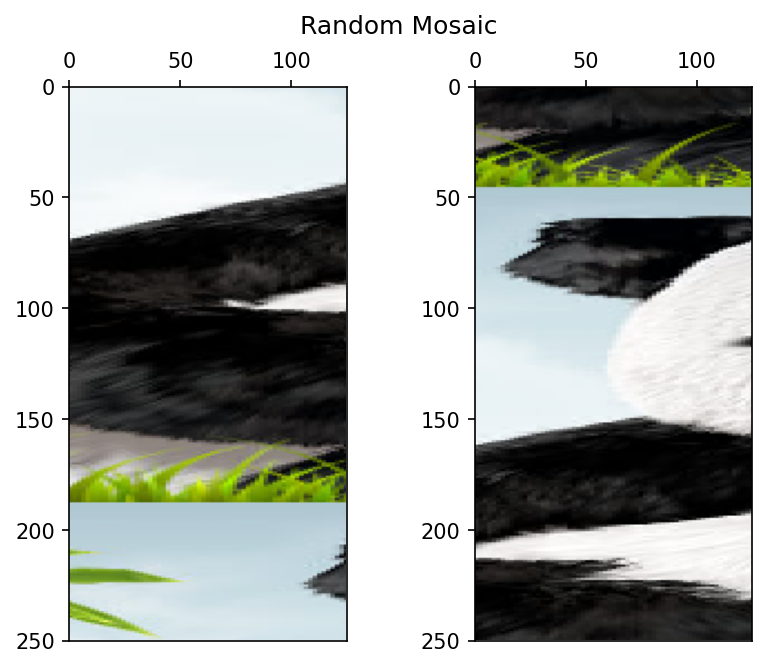

In [ ]:
randommosaic = RandomMosaic(
    (250, 125),
    (4, 4),
    (0.3, 0.7),
    align_corners=True,
    cropping_mode="resample",
    padding_mode="reflect",
    resample="nearest",
    keepdim=False,
    p=1.0,
)
plot_tensor(randommosaic(inpt), "Random Mosaic")

#### Random Jigsaw

In [ ]:
# randomjigsaw = RandomJigsaw((2, 2), ensure_perm=False, same_on_batch=False, keepdim=False, p=1.0)


# plot_tensor(randomjigsaw(inpt), "Random Jigsaw")